# Exercise numerical accuracy
Various methods (backward and trapezoidal Euler) applied to model the development of electric current over time, focussing on the numerical accuracy of the applied methods, for example for different time steps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Definition of function that shows electric current over time
def Icurrent(N,h,dt,printTable=True):
    t = dt
    N = int(N)
    data = np.zeros((2,N))
    L = 0.2
    for i in range(N-1):
        V = 2.0*np.cos(2*t)
        q = h*np.array([0,V/L])
        A = np.array([[0,1],[-6666667,-6e3]])
        I = np.array([[1,0], [0,1]])
        B = I-h*A
        b = np.add(data[:,i], q)
        data[:,i+1] = np.linalg.solve(B, b)
        t+= dt
    t_array = np.linspace(0,1,N)
    
    plt.figure()
    plt.plot(t_array,data[0,:],'r')
    plt.legend(("$y_1$", "$y_2$"),
               loc="upper right", shadow=True)
    plt.xlabel("$t$")
    plt.ylabel("$y$")
    plt.title("Graph of $y_1$")
    
    if printTable == True:
        table = " index   t            I             \n"
        for k in range(0,N):
            table = table + "{:4d} {:6.1f}: {:17.7e}\n".format(
                k,t_array[k],data[0,k],data[1,k])
        return table
    
    else:
        return ""

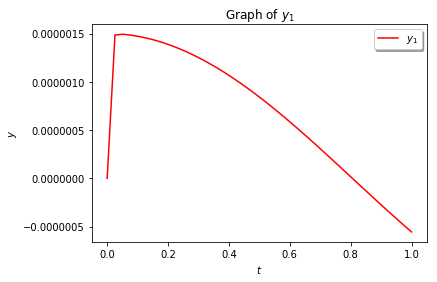

In [3]:
# Specify parameters
h = 0.1
dt = 0.025
t_end = 1.025
N = int(t_end / dt)

print(Icurrent(N,h,dt,False))

In [4]:
# Check of the accuracy for different time step sizes

def Icurrent2(N,h,t):
    data = np.zeros((2,N+1))
    L = 0.2
    for i in range(N):
        V = 2.0*np.cos(2*t)
        q = h*np.array([0,V/L])
        A = np.array([[0,1],[-6666667,-6e3]])
        I = np.array([[1,0], [0,1]])
        B = I-h*A
        b = np.add(data[:,i], q)
        data[:,i+1] = np.linalg.solve(B, b)
        t+= h
    return data[0,-1]
print ('Wh = ',Icurrent2(60,0.025,0.025))
print ('W2h = ',Icurrent2(30,0.05,0.05))

def Accuracy(alpha,wh,w2h):
    E = alpha*(wh-w2h)
    return E
print ('The accuracy E = ', Accuracy(1,Icurrent2(60,0.025,0.025),Icurrent2(30,0.05,0.05)))

Wh =  -1.484537109301864e-06
W2h =  -1.4844709035513718e-06
The accuracy E =  -6.620575049228559e-11


In [5]:
# To play with different settings of a sine function to see the similarity with the electric current signal
from IPython.html.widgets import interact

def Icurrent3(N,h,t):
    data = np.zeros((2,N))
    L = 0.2
    for i in range(N-1):
        V = 2.0*np.cos(2*t)
        q = h*np.array([0,V/L])
        A = np.array([[0,1],[-6666667,-6e3]])
        I = np.array([[1,0], [0,1]])
        B = I-h*A
        b = np.add(data[:,i], q)
        data[:,i+1] = np.linalg.solve(B, b)
        t+= h
    return data[0]

def sinfunc(a,omega,phi):
    x = np.linspace(0,25,500)
    y = a * np.sin(omega*x + phi)
    plt.plot(x,y)
    t = np.linspace(0,10,400)
    plt.plot(t,Icurrent3(400,0.025,0.025))
    plt.xlim(0,10)

interact(sinfunc,
         a = 0.0000015,
         omega = (0.2,6.0,0.1),
         phi = (0.0,0.5*np.pi));


D:\Programs\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(FloatSlider(value=1.5e-06, description='a', max=4.5e-06, min=-1.5e-06), FloatSlider(valu…

In [6]:
def sinfunc1(a,omega,phi):
    x = np.linspace(0,25,500)
    y = a * np.sin(omega*x + phi)
    plt.plot(x,y)
    t = np.linspace(0,0.5,20)
    plt.plot(t,Icurrent3(20,0.025,0.025))
    plt.xlim(0,0.5)


interact(sinfunc1,
         a = 0.0000015,
         omega = (0.2,6.0,0.1),
         phi = (0.0,0.5*np.pi));


interactive(children=(FloatSlider(value=1.5e-06, description='a', max=4.5e-06, min=-1.5e-06), FloatSlider(valu…

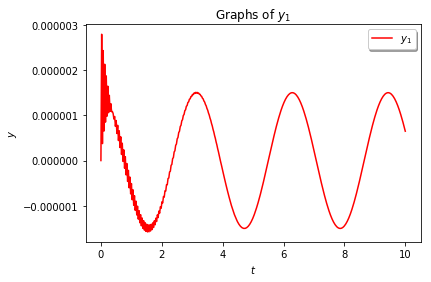

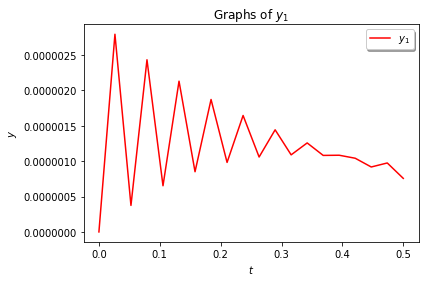

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def Icurrent4(N,h,f,t=0.025):
    data = np.zeros((2,N))
    L = 0.2
    for i in range(N-1):
        V = 2.0*np.cos(2*t)
        q = h*np.array([0,V/L])
        A = np.array([[0,1],[-6666667,-6e3]])
        I = np.array([[1,0], [0,1]])
        B = I-(h/2.)*A
        C = np.dot((h/2.)*A,data[:,i])
        g = np.add(data[:,i], q)
        b = np.add(g,C)
        data[:,i+1] = np.linalg.solve(B, b)
        t+= 0.025
    t_array = np.linspace(0,f,N)
    
    plt.figure()
    plt.plot(t_array,data[0,:],'r')
    plt.legend(("$y_1$", "$y_2$"),
               loc="upper right", shadow=True)
    plt.xlabel("$t$")
    plt.ylabel("$y$")
    plt.title("Graphs of $y_1$")
    plt.show()
    return ""

print (Icurrent4(400,0.025,10))
print (Icurrent4(20,0.025,0.5))

In [8]:
def Icurrent2(N,h,t):
    data = np.zeros((2,N+1))
    R = 1200.
    L = 0.2
    C=75e-8
    A = np.array([[0,1],[-1/(C*L),-R/L]])
    I = np.array([[1,0], [0,1]])
    B = I-(h/2.)*A
    for i in range(N):
        V1 = 2.0*np.cos(2*t)
        V2 = 2.0*np.cos(2*(t+h))
        q1 =np.array([0,V1/L])
        q2 =np.array([0,V2/L])
        W = A.dot(data[:,i])
        b = data[:,i] + (h/2.)*(W+q1+q2)
        data[:,i+1] = np.linalg.solve(B,b )
        t+= h
    return data[0,-1]

print ('Wh = ', Icurrent2(60,0.025,0.025+0.025) )
print ('W2h = ', Icurrent2(30,0.05,0.05+0.05) )

def Accuracy(alpha,wh,w2h):
    E = alpha*(wh-w2h)
    return E
print ('The accuracy = ', Accuracy((1/3.),Icurrent2(60,0.025,0.0),Icurrent2(30,0.05,0.0)) )


Wh =  -1.415527580749566e-06
W2h =  -1.507388903273513e-06
The accuracy =  3.112752320385182e-08


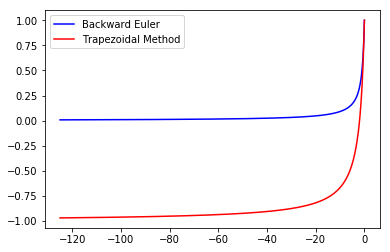

In [9]:
# Error convergence for different timesteps and numerical derivation schemes. 

def QBE(hlabda):
    z = 1/(1-hlabda)
    return z

def QTrap(hlabda):
    z = (1 + hlabda/2)/(1 - hlabda/2)
    return z


hlabda = np.linspace(-125,0,1000)
plt.plot(hlabda,QBE(hlabda), 'b', label='Backward Euler')
plt.plot(hlabda,QTrap(hlabda), 'r', label='Trapezoidal Method')
plt.legend(loc=2)